## import library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator

## Load image

### Augmented image

In [2]:
def random_brightness(image):
    return tf.image.random_brightness(image,max_delta=0.5)

In [3]:
train_dir = 'Multi-class Weather Dataset/train'
val_dir = 'Multi-class Weather Dataset/val'

img_datagen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 0.45,
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    preprocessing_function = random_brightness
)

### Load Image

In [4]:
train_generator = img_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 8,
    shuffle = True,
    class_mode = 'categorical',
)

validation_generator = img_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 8, 
    shuffle = True,
    class_mode = 'categorical',
)

Found 896 images belonging to 4 classes.
Found 227 images belonging to 4 classes.


In [5]:
image, label = train_generator.next()

In [6]:
label_name = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


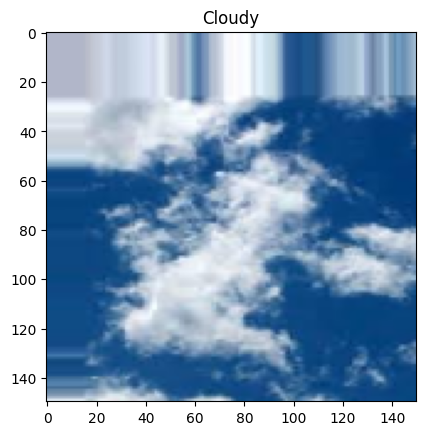

In [7]:
index = 1
plt.title(label_name[tf.argmax(label[index])])
plt.imshow(image[1])

In [9]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[150,150,3]),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
hasilTrain = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
112/112 [==============================] - 26s 220ms/step - loss: 0.8887 - accuracy: 0.6183 - val_loss: 0.5674 - val_accuracy: 0.6872
Epoch 2/10
112/112 [==============================] - 18s 158ms/step - loss: 0.6679 - accuracy: 0.7199 - val_loss: 0.4548 - val_accuracy: 0.8502
Epoch 3/10
112/112 [==============================] - 18s 160ms/step - loss: 0.5920 - accuracy: 0.7656 - val_loss: 0.4915 - val_accuracy: 0.8502
Epoch 4/10
112/112 [==============================] - 17s 153ms/step - loss: 0.5316 - accuracy: 0.7913 - val_loss: 0.4171 - val_accuracy: 0.8767
Epoch 5/10
112/112 [==============================] - 17s 155ms/step - loss: 0.4892 - accuracy: 0.7969 - val_loss: 0.4977 - val_accuracy: 0.7621
Epoch 6/10
112/112 [==============================] - 21s 185ms/step - loss: 0.4871 - accuracy: 0.8114 - val_loss: 0.3739 - val_accuracy: 0.8722
Epoch 7/10
112/112 [==============================] - 19s 171ms/step - loss: 0.4861 - accuracy: 0.8237 - val_loss: 0.3328 - val_ac

## Evaluate the model with test dataset

In [14]:
loss1, accuracy1 = model.evaluate_generator(validation_generator,steps=20)
print('Test Loss: %.3f' % loss1)
print('Test Accuracy: %.3f' % accuracy1)

C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_20196\488355280.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss1, accuracy1 = model.evaluate_generator(validation_generator,steps=20) #harusnya jadi test_val


Test Loss: 0.278
Test Accuracy: 0.925


## Plotting model

C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_20196\1134013737.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', color='r', label='Akurasi Training')
C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_20196\1134013737.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_accuracy, 'b', color='b', label='Akurasi Validation')
C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_20196\1134013737.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b',color='r', label='Loss Training')
C:\Users\Hp Gk\AppData\Local\Temp\ipykernel_20196\1134013737.py:17: UserWarnin

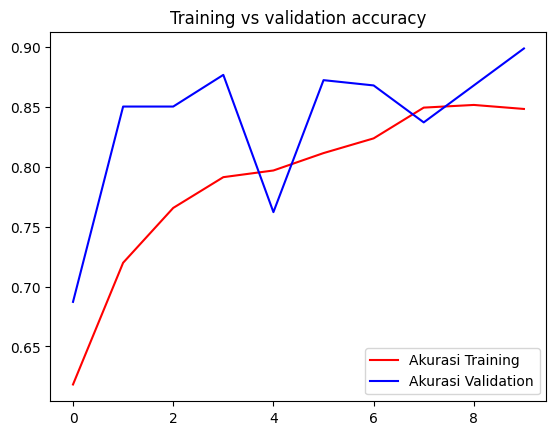

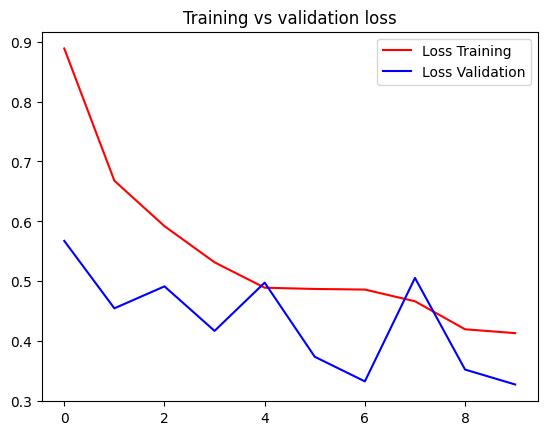

In [15]:
import matplotlib.pyplot as plt
acc = hasilTrain.history['accuracy']
val_accuracy = hasilTrain.history['val_accuracy']
loss = hasilTrain.history['loss']
val_loss = hasilTrain.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', color='r', label='Akurasi Training')
plt.plot(epochs, val_accuracy, 'b', color='b', label='Akurasi Validation')
plt.title('Training vs validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b',color='r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', color='b', label='Loss Validation')
plt.title('Training vs validation loss')
plt.legend()

plt.show()